<a href="https://colab.research.google.com/github/dgatti/PortfolioBigData/blob/main/PrimerosPasosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


## **Primeros pasos con Python**
**Cargar un DataSet y generar un pequeño gráfico**

In [ ]:
datos=pd.read_excel("/content/drive/MyDrive/Curso Python/frutas.xlsx")
DF=pd.DataFrame(datos)

In [ ]:
for i in datos.index:
  print("Peso fruta {} = {}".format(i,datos['mass'][i])) #Probando .format para formatear el tipo de dato

In [3]:
import matplotlib.pyplot as plt

In [ ]:
ejex=np.array(datos['fruit_name'])
ejey=np.array(datos['mass'])
ejey2=np.array(datos['color_score'].values)

nombre_fruta=np.unique(datos['fruit_name'].values) #probando el .unique

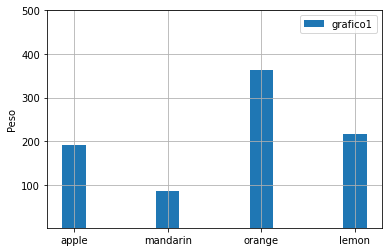

In [ ]:
ancho_barra=0.25
plt.bar(ejex,ejey,width=ancho_barra,label='grafico1')
#plt.bar(ejex+ancho_barra,ejey2,width=ancho_barra,label='grafico2') 
plt.ylabel('Peso')
plt.grid(True)
plt.legend()
plt.ylim(1,500)
plt.show()

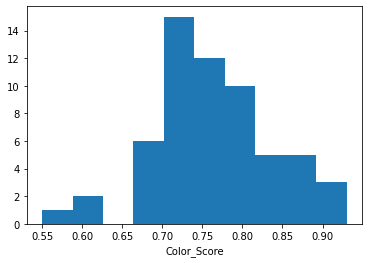

In [ ]:
plt.hist(ejey2)
plt.xlabel('Color_Score')
plt.show()

 **Probando el armado de listas**


In [ ]:
datos=pd.read_csv("/content/drive/MyDrive/Curso Python/Indicators.csv")

In [ ]:
datos.head(10)

In [ ]:
datos.shape

In [ ]:
codigo_paises=datos["CountryCode"].unique().tolist() #Crea una lista, .tolist(), con los registros de CountryCode del DataSet, valores ùnicos, que no se repitan (.unique())
len(codigo_paises)

247

In [ ]:
descrip_indicadores=datos["IndicatorName"].unique().tolist()
print(descrip_indicadores[:10])
len(descrip_indicadores)

['Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (% of total)']


1344

In [ ]:
años=datos["Year"].unique().tolist()
len(años)
print(min(años),'-',max(años))

1960 - 2015


**Continuando con los gráficos**

In [ ]:
indicador_key='CO2 emissions \(metric tons per capita'
pais_key='BRA'

filtro1=datos['IndicatorName'].str.contains(indicador_key) #crea una lista recuperando los registros que contienen el valor indicado
filtro2=datos['CountryCode'].str.contains(pais_key)
datos_filtrados=datos[filtro1 & filtro2] #Genera un nuevo data set solo con registros que contienen la información key

datos_filtrados.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5642,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.647068
29722,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.658625
56759,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.697281
85147,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.700749
113859,Brazil,BRA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.694001


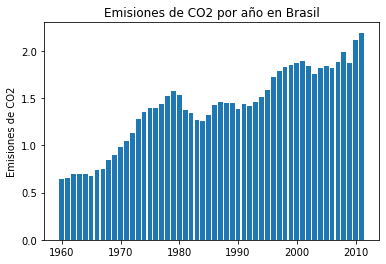

In [ ]:
años=datos_filtrados['Year']
co2=datos_filtrados['Value']
plt.title('Emisiones de CO2 por año en Brasil')
plt.ylabel('Emisiones de CO2')
plt.bar(años,co2)
plt.show()

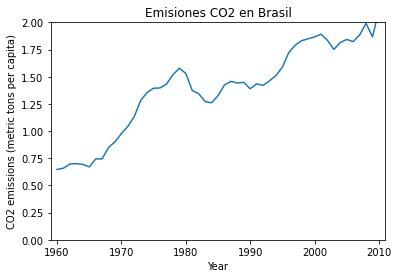

In [ ]:
años_a=datos_filtrados['Year'].values #en este caso, se crea un array con los registros que contienen el valor indicado
co2_a=datos_filtrados['Value'].values
plt.plot(años_a,co2_a) 
plt.xlabel('Year')
plt.ylabel(datos_filtrados['IndicatorName'].iloc[0]) #selecciona un elemento del dataF y lo asigna como etiqueta
plt.title('Emisiones CO2 en Brasil')
plt.axis([1959,2011,0,2])
plt.show()

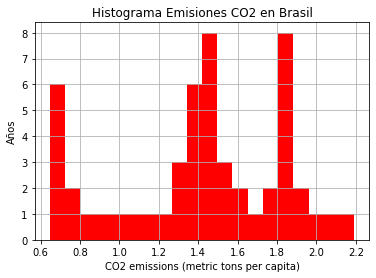

In [ ]:
plt.hist(datos_filtrados['Value'].values,20,facecolor='red')
plt.xlabel(datos_filtrados['IndicatorName'].iloc[0])
plt.ylabel('Años')
plt.title('Histograma Emisiones CO2 en Brasil')
plt.grid(True)
plt.show()

In [4]:
from sklearn import datasets
iris=datasets.load_iris()

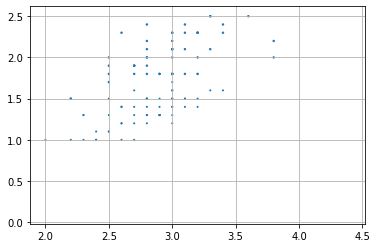

In [5]:
x=iris.data[:,1]
y=iris.data[:,3]
colors=iris.target
plt.scatter(x,y,colors)
plt.grid(True)
plt.show()